Loaded precomputed statistics and mean images from file.
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Basic Statistics of Pixel Values in CIFAR-10 Training Set:
            Statistic  Pixel Value
0                Mean   120.707565
1  Standard Deviation    64.150076
2                 Min     0.000000
3                 Max   255.000000

Per-Channel Statistics of Pixel Values in CIFAR-10 Training Set:
  Channel  Mean Pixel Value  Standard Deviation
0     Red        125.306918           62.993219
1   Green        122.950394           62.088708
2    Blue        113.865383           66.704900


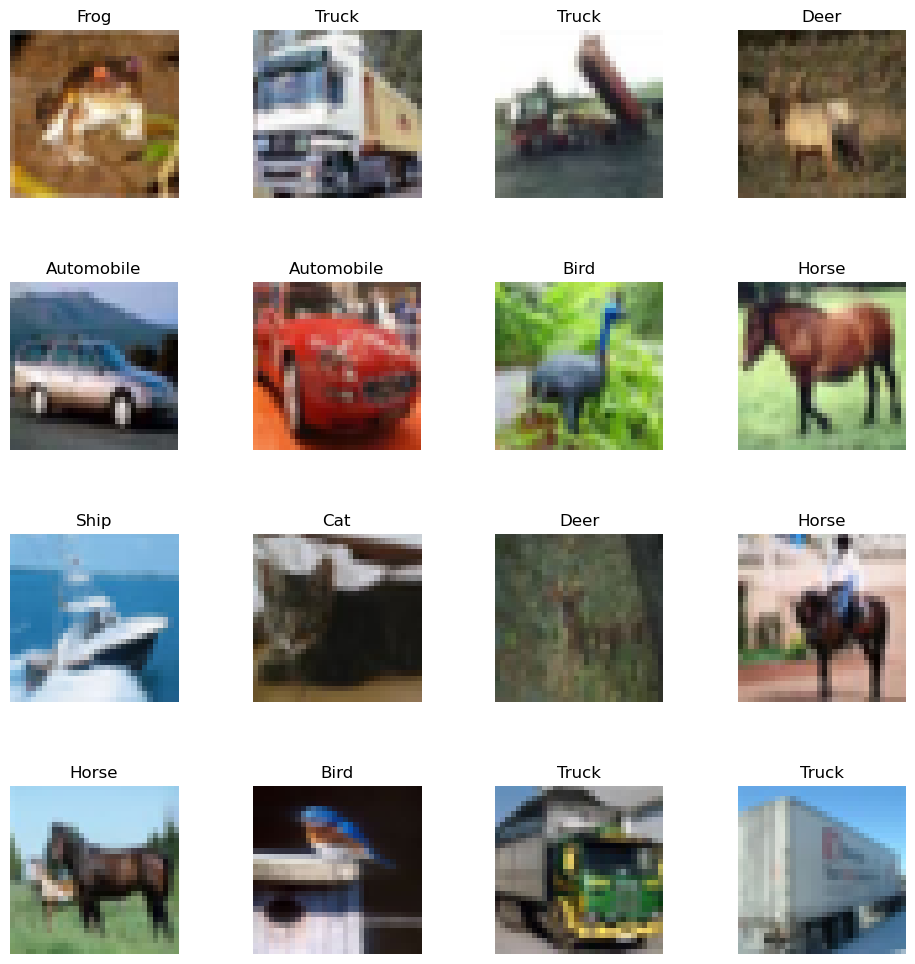

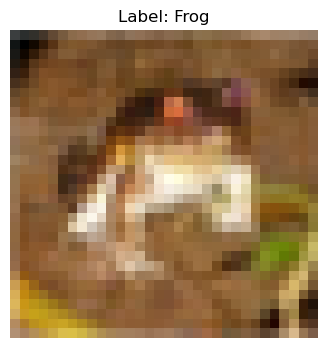

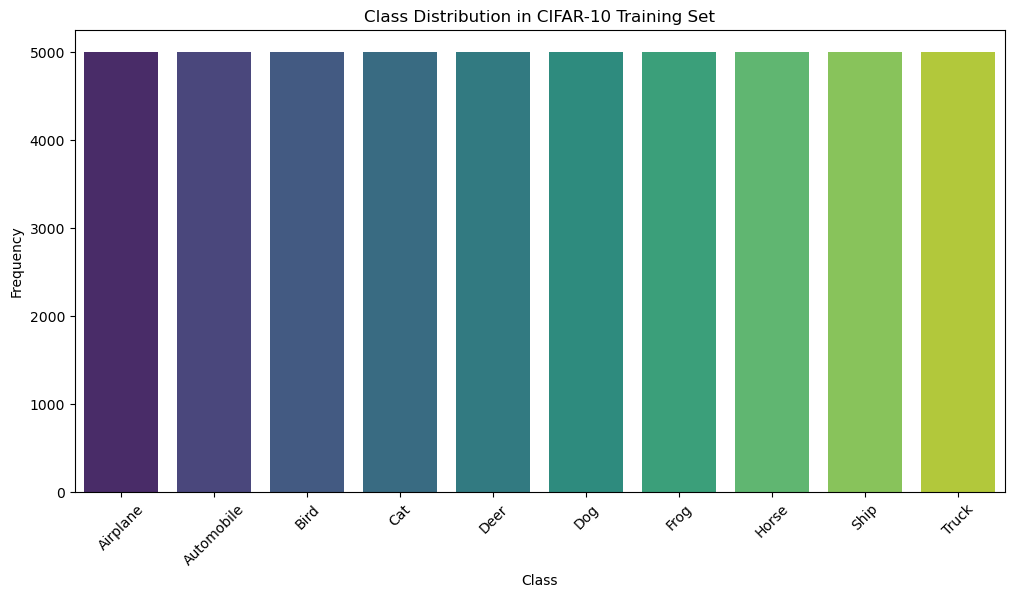

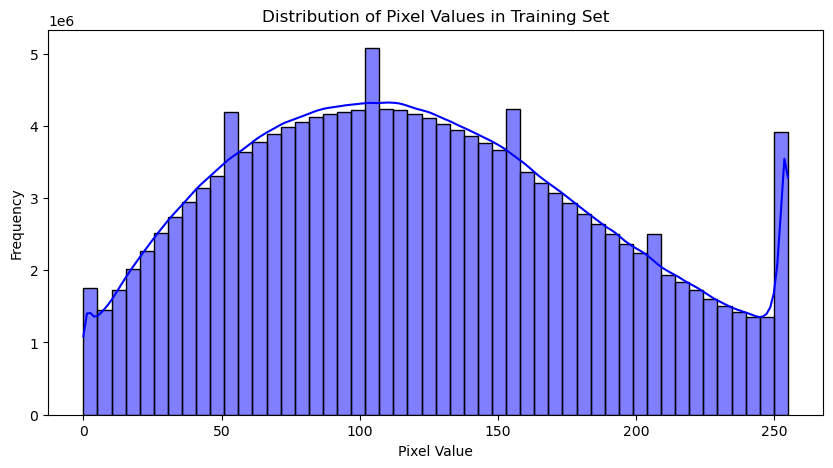

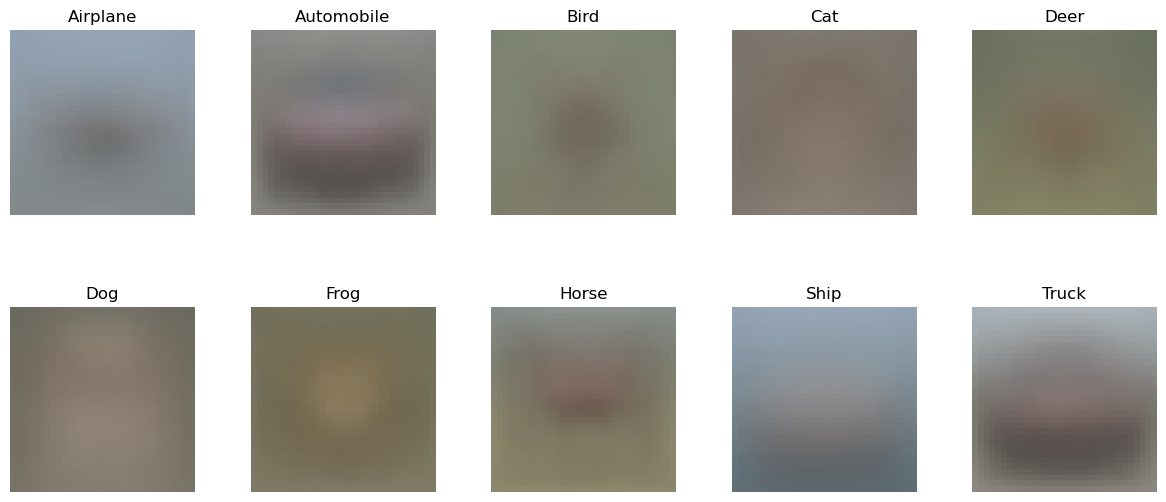

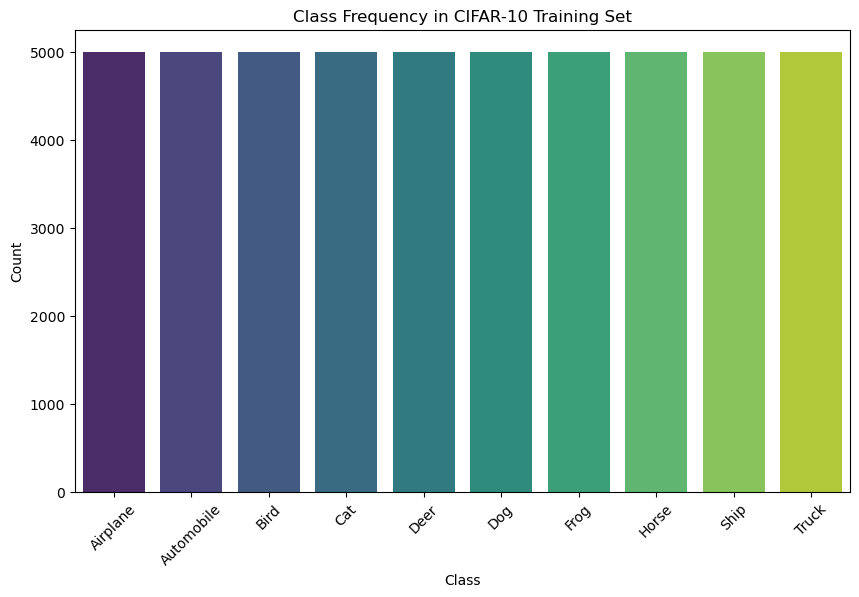

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import pickle
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Check if precomputed data is available
try:
    with open('cifar10_stats.pkl', 'rb') as f:
        basic_stats, channel_stats, mean_images = pickle.load(f)
    print("Loaded precomputed statistics and mean images from file.")
except FileNotFoundError:
    print("No precomputed data found. Calculating statistics...")
    
    # Calculate basic statistics about the images
    mean_pixel_value = train_images.mean()
    std_pixel_value = train_images.std()
    min_pixel_value = train_images.min()
    max_pixel_value = train_images.max()

    # Create a DataFrame for basic statistics
    basic_stats = pd.DataFrame({
        'Statistic': ['Mean', 'Standard Deviation', 'Min', 'Max'],
        'Pixel Value': [mean_pixel_value, std_pixel_value, min_pixel_value, max_pixel_value]
    })

    # Calculate per-channel statistics
    mean_per_channel = train_images.mean(axis=(0, 1, 2))
    std_per_channel = train_images.std(axis=(0, 1, 2))

    # Create a DataFrame for per-channel statistics
    channel_stats = pd.DataFrame({
        'Channel': ['Red', 'Green', 'Blue'],
        'Mean Pixel Value': mean_per_channel,
        'Standard Deviation': std_per_channel
    })

    # Calculate mean images for each class
    mean_images = []
    for i in range(10):
        mean_image = train_images[train_labels.ravel() == i].mean(axis=0)
        mean_images.append(mean_image)
    
    # Save calculated statistics and mean images
    with open('cifar10_stats.pkl', 'wb') as f:
        pickle.dump((basic_stats, channel_stats, mean_images), f)
    print("Statistics and mean images saved to file.")

# Display the shape of the dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

# Display basic statistics
print("Basic Statistics of Pixel Values in CIFAR-10 Training Set:")
print(basic_stats)

# Display per-channel statistics
print("\nPer-Channel Statistics of Pixel Values in CIFAR-10 Training Set:")
print(channel_stats)

# Function to display a grid of images
def plot_image_grid(images, labels, class_names, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.ravel()
    for i in np.arange(0, rows * cols):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[int(labels[i])])
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Plot a 4x4 grid of images from the training dataset
plot_image_grid(train_images, train_labels, class_names)

# Show an individual image with its label
def plot_single_image(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(train_images[index])
    plt.title(f'Label: {class_names[int(train_labels[index])]}')
    plt.axis('off')
    plt.show()

# Plot a single image (e.g., image at index 0)
plot_single_image(0)

# Display the distribution of classes in the training dataset
plt.figure(figsize=(12, 6))
sns.countplot(x=train_labels.ravel(), palette='viridis')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.show()

# Plot the distribution of pixel values
plt.figure(figsize=(10, 5))
sns.histplot(train_images.ravel(), bins=50, color='blue', kde=True)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values in Training Set')
plt.show()

# Plot the mean image of each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(mean_images[i].astype(np.uint8))
    axes[i].set_title(class_names[i])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Display class counts as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Frequency in CIFAR-10 Training Set')
plt.xticks(rotation=45)
plt.show()

Loaded precomputed statistics and mean images from file.
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Basic Statistics of Pixel Values in CIFAR-10 Training Set:
            Statistic  Pixel Value
0                Mean   120.707565
1  Standard Deviation    64.150076
2                 Min     0.000000
3                 Max   255.000000

Per-Channel Statistics of Pixel Values in CIFAR-10 Training Set:
  Channel  Mean Pixel Value  Standard Deviation
0     Red        125.306918           62.993219
1   Green        122.950394           62.088708
2    Blue        113.865383           66.704900


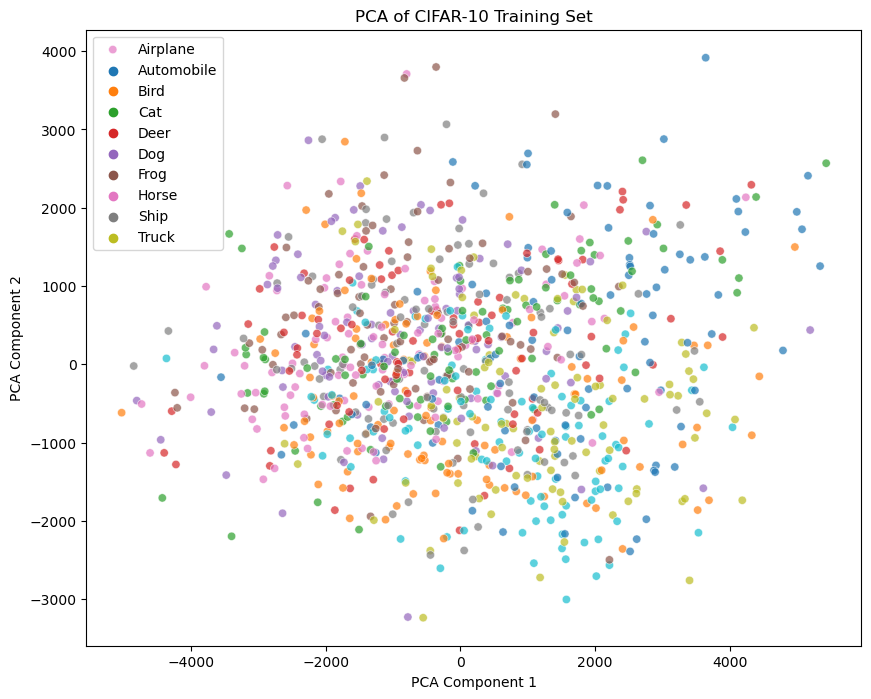

Filtered images shape: (10000, 32, 32, 3)
Filtered labels shape: (10000, 1)


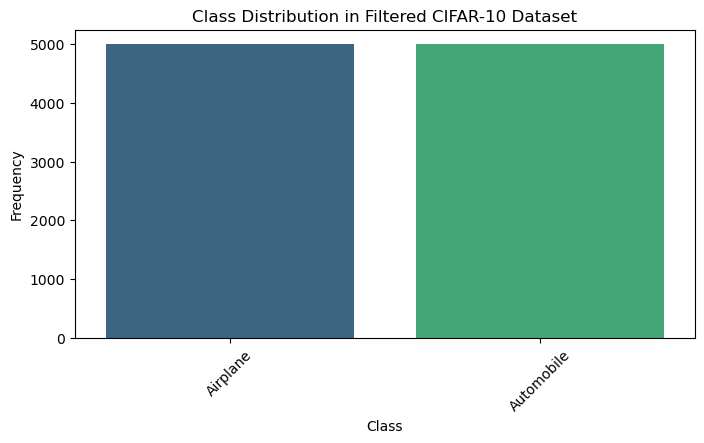

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Check if precomputed data is available
try:
    with open('cifar10_stats.pkl', 'rb') as f:
        basic_stats, channel_stats, mean_images = pickle.load(f)
    print("Loaded precomputed statistics and mean images from file.")
except FileNotFoundError:
    print("No precomputed data found. Calculating statistics...")
    
    # Calculate basic statistics about the images
    mean_pixel_value = train_images.mean()
    std_pixel_value = train_images.std()
    min_pixel_value = train_images.min()
    max_pixel_value = train_images.max()

    # Create a DataFrame for basic statistics
    basic_stats = pd.DataFrame({
        'Statistic': ['Mean', 'Standard Deviation', 'Min', 'Max'],
        'Pixel Value': [mean_pixel_value, std_pixel_value, min_pixel_value, max_pixel_value]
    })

    # Calculate per-channel statistics
    mean_per_channel = train_images.mean(axis=(0, 1, 2))
    std_per_channel = train_images.std(axis=(0, 1, 2))

    # Create a DataFrame for per-channel statistics
    channel_stats = pd.DataFrame({
        'Channel': ['Red', 'Green', 'Blue'],
        'Mean Pixel Value': mean_per_channel,
        'Standard Deviation': std_per_channel
    })

    # Calculate mean images for each class
    mean_images = []
    for i in range(10):
        mean_image = train_images[train_labels.ravel() == i].mean(axis=0)
        mean_images.append(mean_image)
    
    # Save calculated statistics and mean images
    with open('cifar10_stats.pkl', 'wb') as f:
        pickle.dump((basic_stats, channel_stats, mean_images), f)
    print("Statistics and mean images saved to file.")

# Display the shape of the dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

# Display basic statistics
print("Basic Statistics of Pixel Values in CIFAR-10 Training Set:")
print(basic_stats)

# Display per-channel statistics
print("\nPer-Channel Statistics of Pixel Values in CIFAR-10 Training Set:")
print(channel_stats)

# Perform PCA to reduce dimensionality of images for visualization purposes
n_samples = 1000  # Use a subset of the data for faster computation
flat_images = train_images[:n_samples].reshape(n_samples, -1)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(flat_images)

# Create a DataFrame with PCA components and labels
pca_df = pd.DataFrame({
    'PCA1': principal_components[:, 0],
    'PCA2': principal_components[:, 1],
    'Label': train_labels[:n_samples].ravel()
})

# Plot PCA components to visualize class separability
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Label', palette='tab10', data=pca_df, legend='full', alpha=0.7)
plt.title('PCA of CIFAR-10 Training Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(class_names)
plt.show()

# Filter data by specific classes for further analysis
# Example: Filtering only 'Airplane' and 'Automobile' classes
filtered_indices = np.where((train_labels == 0) | (train_labels == 1))[0]
filtered_images = train_images[filtered_indices]
filtered_labels = train_labels[filtered_indices]

# Display filtered dataset information
print(f'Filtered images shape: {filtered_images.shape}')
print(f'Filtered labels shape: {filtered_labels.shape}')

# Display the distribution of the filtered classes
plt.figure(figsize=(8, 4))
sns.countplot(x=filtered_labels.ravel(), palette='viridis')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Airplane', 'Automobile'], rotation=45)
plt.title('Class Distribution in Filtered CIFAR-10 Dataset')
plt.show()